# Pymaceuticals Inc.
---

### Analysis

- From the comparison of the Capomulin, Ramicane, Infubinol, and Ceftamin treatments, the data shows that Capomulin and Ramicane reduced tumor volumes (mm3) better than Ceftmin and Infubinol (see "Tumor Volume by Drug Regimen" box plot). While the means of Capomulin and Ramicane final tumor volumes were in the high 30's range, Infubinol- and Ceftamin-treated mice final tumor volumes were on average around 60mm3. Interestingly, Infubinol had one outlier which was similar to the Capomulin and Ramicane averages.


- Another key find from the analysis showed that there is a strong, positive correlation between a mouse's weight and the tumor volume (see "Average Mouse Weight vs. Average Tumor Volume (Capomulin Treatment) scatter plot"). This relationship showed that per gram added in a mouse's weight, the tumor increased by 0.95mm3 on average. The intercept of the linear regression equation suggests that a tumor begins at around 21.55mm3 for any mouse which is probably a little misleading. 
 
- Looking at the Summary Statistics Table, we can also identify the least successful treatments: Ketapril, Neftisol. Not only was there extremely variable data (in comparison to the other treatments), the mean tumor volume and variance were higher than the placebo suggesting that they enlarged the tumor more than not treating the tumor at all.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how="outer")
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice = len(combined_data_df["Mouse ID"].value_counts())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
time_points = combined_data_df["Timepoint"].value_counts()
number_of_time_ID_appears = combined_data_df['Mouse ID'].value_counts()
number_of_time_ID_appears = number_of_time_ID_appears.reset_index()
# duplicate_mice
duplicate_mice_row = number_of_time_ID_appears.loc[number_of_time_ID_appears['Mouse ID']>len(time_points)]
duplicate_mice_ID = duplicate_mice_row.iloc[0,0]
duplicate_mice_ID
all_data_for_duplicate_mice = combined_data_df.loc[combined_data_df['Mouse ID']==duplicate_mice_ID]
all_data_for_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.loc[combined_data_df['Mouse ID']!=duplicate_mice_ID]
clean_data_df.sort_values("Timepoint")


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1195,v409,0,45.000000,0,Placebo,Female,16,25
1579,u946,0,45.000000,0,Propriva,Male,5,30
1193,w140,0,45.000000,0,Zoniferol,Female,19,30
227,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
500,j989,45,36.134852,1,Ramicane,Male,8,19
1239,x773,45,58.634971,4,Placebo,Female,21,30
1764,j119,45,38.125164,1,Capomulin,Female,7,23
470,a411,45,38.407618,1,Ramicane,Male,3,22


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_data_df["Mouse ID"].value_counts())
num_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_data_df.groupby('Drug Regimen').mean().iloc[:,1]
median_tumor_volume = clean_data_df.groupby('Drug Regimen').median().iloc[:,1]
std_tumor_volume = clean_data_df.groupby('Drug Regimen').std().iloc[:,1]
var_tumor_volume = clean_data_df.groupby('Drug Regimen').var().iloc[:,1]
sem_tumor_volume = clean_data_df.groupby('Drug Regimen').sem().iloc[:,1]


summary_statistics_table = pd.DataFrame({
                          'Mean Tumor Volume':mean_tumor_volume,
                          'Median Tumor Volume':median_tumor_volume,
                          'Tumor Volume Variance':var_tumor_volume,
                          'Tumor Volume Std. Dev.':std_tumor_volume,
                          'Tumor Volume Std. Err.':sem_tumor_volume})

summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
regimen_stats = combined_data_df.groupby("Drug Regimen")
tumor_by_regimen = regimen_stats["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std','sem'])

tumor_by_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

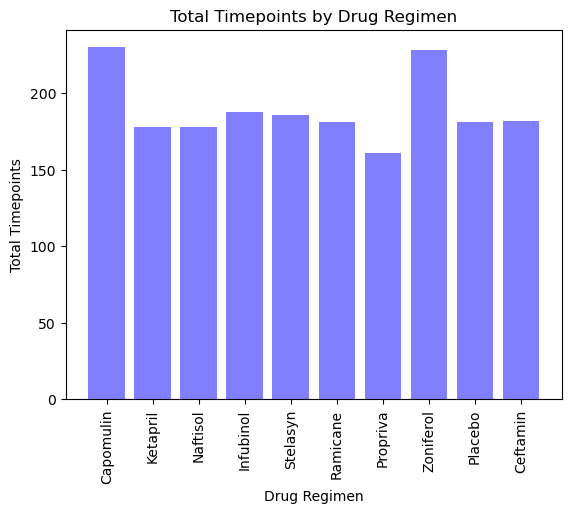

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mouse_timepoint = combined_data_df.loc[:, ["Timepoint", "Drug Regimen"]]

timepoint_regimen_group = mouse_timepoint.groupby('Drug Regimen')
                                          
timepoint = timepoint_regimen_group["Timepoint"].count()
drug_regimen = mouse_timepoint["Drug Regimen"].unique()
    
x_axis= np.arange(len(timepoint))

plt.bar(x_axis, timepoint, color='blue', alpha=0.5, align="center");

tick_location = [value for value in x_axis]
plt.xticks(tick_location, drug_regimen, rotation=90)

plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

plt.show()

Text(0, 0.5, 'Total Timepoints')

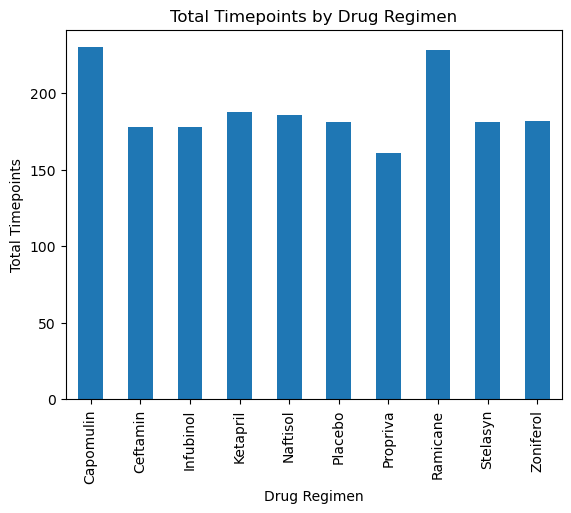

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_timepoint = timepoint.plot(kind="bar", title="Total Timepoints by Drug Regimen")
regimen_timepoint.set_xlabel("Drug Regimen")
regimen_timepoint.set_ylabel("Total Timepoints")


Text(0.5, 1.0, 'Mouse Distribution by Sex')

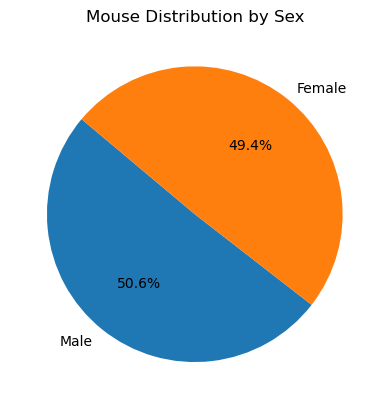

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_gender = combined_data_df.loc[:, ["Sex"]]

labels = ["Male", "Female"]
gender = mouse_gender["Sex"].value_counts()

gender_count = plt.pie(gender, labels=labels, 
                       autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Mouse Distribution by Sex")

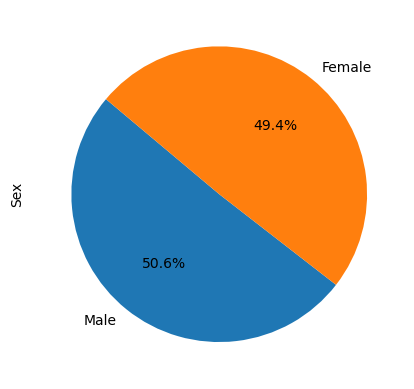

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_plot = gender.plot(kind="pie", startangle=140, autopct="%1.1f%%", shadow=False)


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

group_by_mouse_ID = combined_data_df.groupby("Mouse ID")
max_timepoint = group_by_mouse_ID['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_volume = max_timepoint.merge(combined_data_df, on=["Mouse ID", "Timepoint"], how="left")
max_timepoint_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [29]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimens:
    tumor_by_drug = max_timepoint_volume.loc[max_timepoint_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume.append(tumor_by_drug)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = max_timepoint_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
# Determine outliers using upper and lower bounds

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)
(lowerbound, upperbound)

(17.400437649999986, 93.49183637000002)

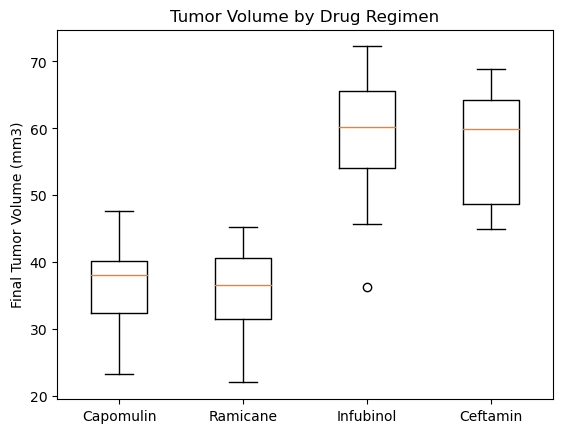

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
x = [1,2,3,4]
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
plt.xticks(x, drug_regimens)
plt.show()


## Line and Scatter Plots

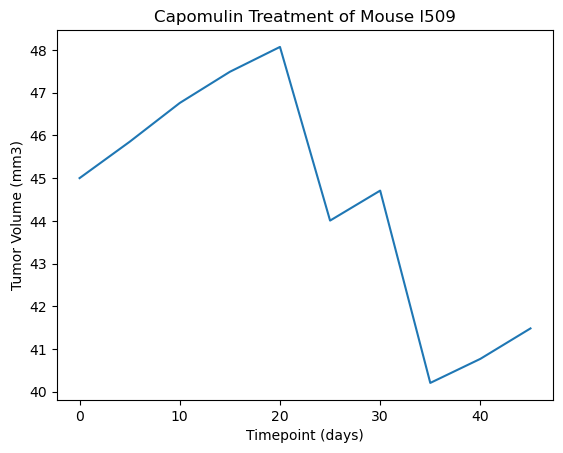

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse = combined_data_df.loc[combined_data_df["Mouse ID"] == "l509"]

Capomulin_time = Capomulin_mouse["Timepoint"]
Capomulin_volume = Capomulin_mouse["Tumor Volume (mm3)"]

x_axis = np.arange(0,45,0.5)

plt.plot(Capomulin_time, Capomulin_volume)

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show()


Text(0.5, 1.0, 'Capomulin Average Tumor Volume vs. Mouse Weight')

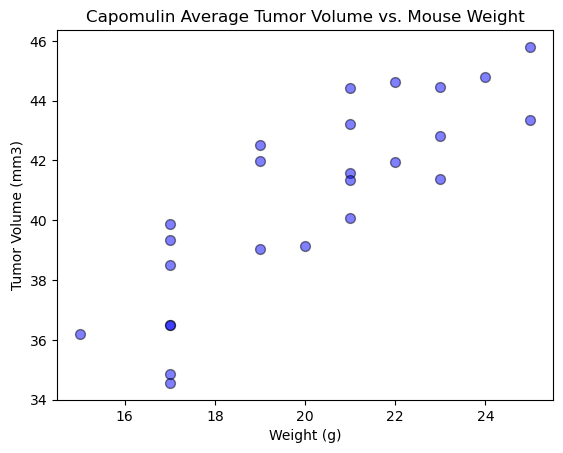

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_drug = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin"]
Average_volume = Capomulin_drug.groupby(['Mouse ID']).mean()

Avg_tumor_vol = Average_volume['Tumor Volume (mm3)']
Avg_weight = Average_volume['Weight (g)']

plt.scatter(Avg_weight, Avg_tumor_vol, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.50)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume vs. Mouse Weight")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0.5, 1.0, 'Average Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')

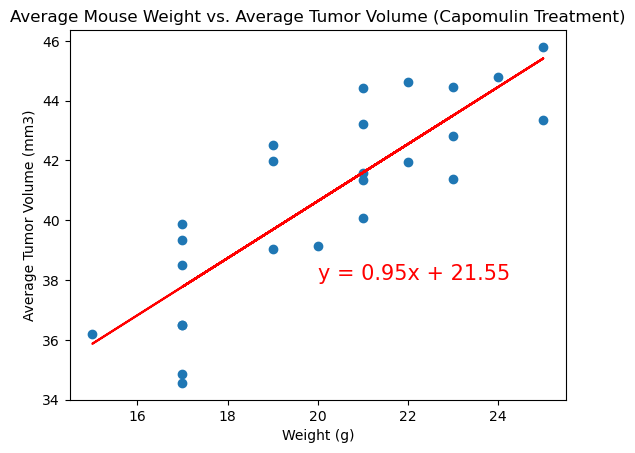

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(Avg_weight,Avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Avg_weight, Avg_tumor_vol)
#y = mx + b
regress_values = slope * Avg_weight  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Avg_weight,Avg_tumor_vol)
plt.plot(Avg_weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)")